# Проект Интернет-магазин

**Цель проекта** Изучить несколько гипотез для увеличения выручки интернет-магазина, а именно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание данных**

Для Части 1 

Файл hypothesis.csv. 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Для Части 2

Файл orders.csv. 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv. 
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**План работ** 

* Изучение и подготовка данных
* Приоритезация гипотез
* A/B тестирование, а именно построить график кумулятивной выручки по группам, график кумулятивного среднего чека по группам, график относительного изменения кумулятивного среднего чека группы B к группе A, график кумулятивного среднего количества заказов по группам, график относительного изменения кумулятивного среднего количества заказов группы B к группе A, точечный график количества заказов по пользователям, посчитать 95-й и 99-й перцентили количества заказов на пользователя, построить точечный график стоимостей заказов, посчитать 95-й и 99-й перцентили стоимости заказов, посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным, статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным, статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
* Выводы



## Изучение и подготовка данных

Для начала изучим и подготовим данные

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 400
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

register_matplotlib_converters()

In [2]:
data = pd.read_csv('hypothesis.csv', sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем название столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


## Приоритезация гипотез

Далее применить фреймворки ICE и RICE для приоритизации гипотез и сравним результаты

ICE рассчитывается как произведение impact на confidence деленное на efforts, где: Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу.

RICE рассчитывается как произведение reach на impact на confidence деленное на efforts, где:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;


In [6]:
data['ICE']=data['impact']*data['confidence']/data['efforts']

display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [7]:
data['RICE']=data['reach']*data['impact']*data['confidence']/data['efforts']

display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что по методу ICE на первом месте оказалась гипотеза 8, а по методу RICE  гипотеза 7. Разница между этим методами состоит в том, что в методе RICE дополнительно умножают на параметр Reach, который показывает скольких пользователей затронет изменение, которое мы хотим внести. У гипотезы 7 параметр Reach высокий и равен 10, а у 8 гипотезы всего 1. Аналогичным образом параметр Reach повлиял и на изменение в приоритезации других гипотезах при расчете RICE. 

## A/B тестирование


Изучим данные для 2 части:

In [8]:
orders = pd.read_csv('orders.csv', sep=',')

In [9]:
visitors = pd.read_csv('visitors.csv', sep=',')

In [10]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
display(orders.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
display(visitors.isna().sum())

date        0
group       0
visitors    0
dtype: int64

In [16]:
display(orders.duplicated().sum()) 

0

In [17]:
display(visitors.duplicated().sum()) 

0

Проверим, есть ли пользователи, попавшие в обе группы А и В, выведем список:

In [18]:
visitors_groups=orders.groupby('visitorId').agg({'group':'nunique'}).query('group == 2')
display(len(visitors_groups))


58

Пользователи, попавшие в 2 группы есть, удалим их и далее будем дальше строить анализ без них.

In [19]:
groupA=orders.query('group=="A"')
groupB=orders.query('group=="B"')
crossing_visitors=set(groupA['visitorId']).intersection(set(groupB['visitorId']))
orders=orders.query('visitorId not in @crossing_visitors').reset_index()

visitors_groups=orders.groupby('visitorId').agg({'group':'nunique'}).query('group == 2')
display(len(visitors_groups))

0

Удаление прошло успешно, пользователей, попавших в две группы, не осталось.

Далее построим график кумулятивной выручки по группам:

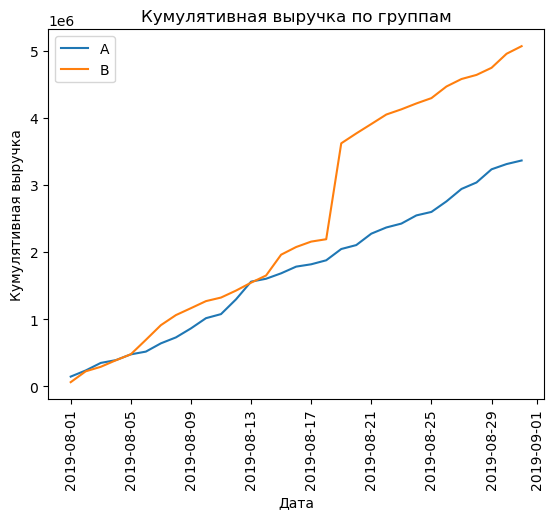

In [20]:

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]





cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')


plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=90)
plt.legend();


Выручка увеличивается в течение всего теста в группе А и в группе В. 
График выручки группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 


Далее построим график кумулятивного среднего чека по группам:

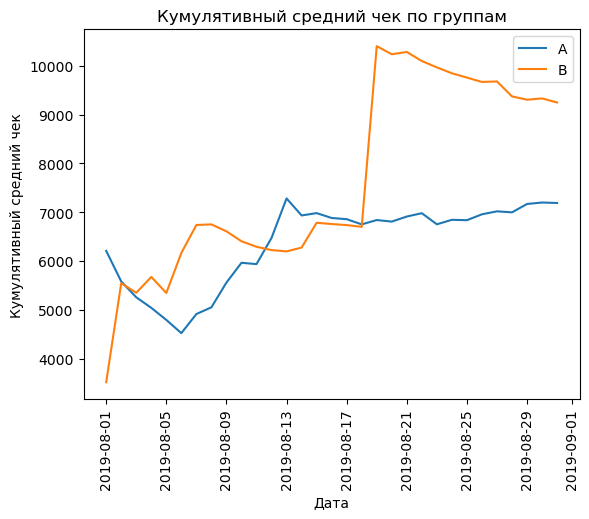

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=90);



Также наблюдаем резкий рост среднего чека в одной точке в группе В. Возможно резкий всплеск на графике объясняется тем, что в группу B попали крупные заказы. Тогда кривой нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. В группе А наблюдаем тенденцию к росту, в группе В тенденцию к падению после скачка, однако средний чек выше в группе В.

Далее построим график относительного изменения кумулятивного среднего чека группы B к группе A:

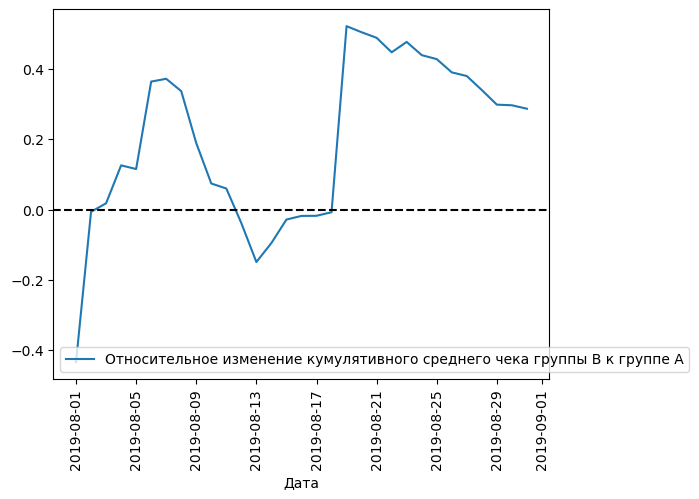

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.legend() 

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Дата')

plt.xticks(rotation=90);


В нескольких точках график различия между сегментами резко меняются. Это говорит о крупных заказах или выбросах аномальных значений. После резкого скачка график имеет тенденцию к понижению.

Построим график кумулятивного среднего количества заказов по группам:

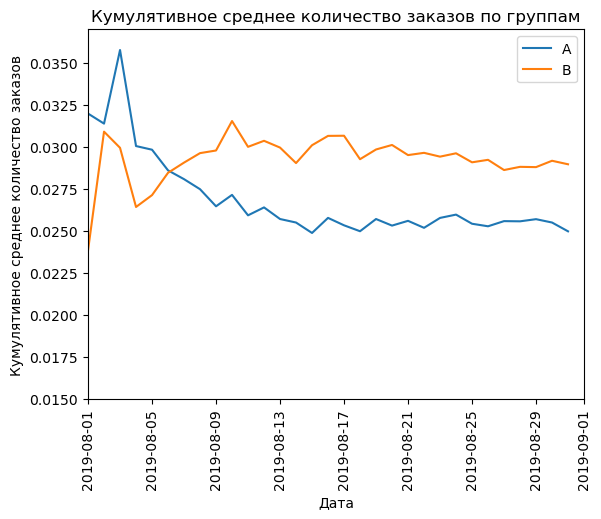

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()



plt.axis(["2019-08-01", '2019-09-01', 0.015, 0.037]) 
plt.title('Кумулятивное среднее количество заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')

plt.xticks(rotation=90);

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A:

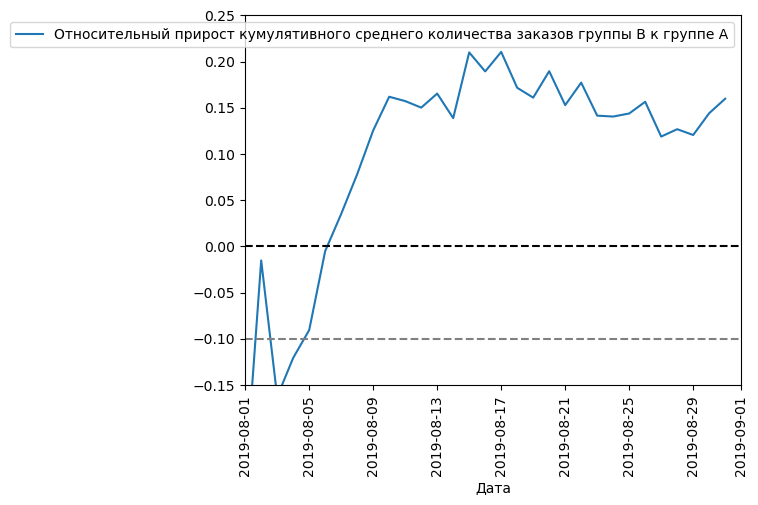

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.15, 0.25]) 

plt.xlabel('Дата')



plt.xticks(rotation=90);


Наблюдаем бурный рост кумулятивного среднего количества заказов группы B к группе A

Построим точечный график количества заказов по пользователям:

Text(0, 0.5, 'Количество заказов')

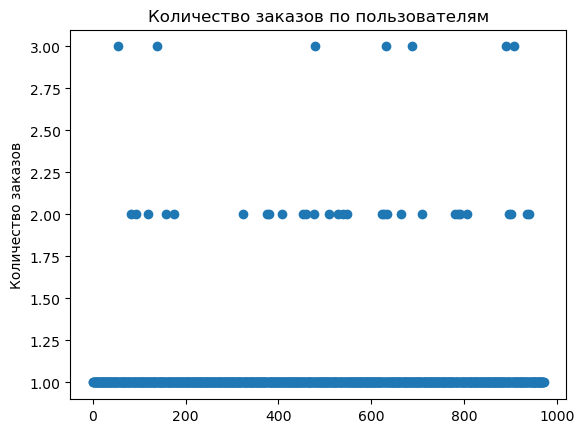

In [25]:
ordersByVisitors = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByVisitors.columns = ['visitorId', 'orders'] 
    
    
    
    
x_values = pd.Series(range(0,len(ordersByVisitors)))

plt.scatter(x_values, ordersByVisitors['orders']) 
plt.title('Количество заказов по пользователям')

plt.ylabel('Количество заказов')


Много пользователей с 1 заказом

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя: 

In [26]:
display(np.percentile(ordersByVisitors['orders'], [95, 99])) 

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказа. И 1% пользователей заказывали более 2 раз.

Построим точечный график стоимостей заказов: 

Text(0.5, 1.0, 'Стоимость заказов')

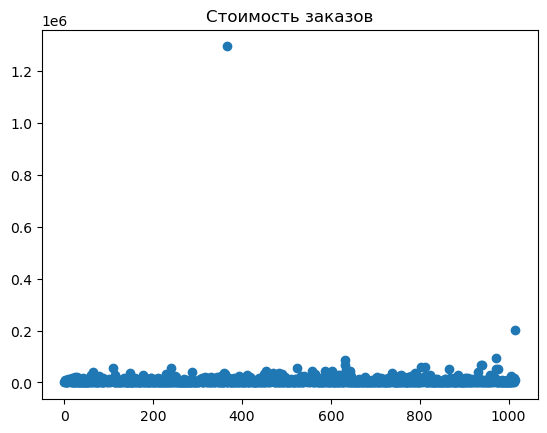

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('Стоимость заказов')

На графике видим совсем немного выбросов

Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [28]:
display(np.percentile(orders['revenue'], [95, 99])) 

array([26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным, сначала подготовим данные. Нулевая гипотеза H0: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза H1: различия в среднем количестве заказов между группами есть.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 


sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


display(" p-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("Относительный выигрыш группы B  {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 



' p-value 0.011'

'Относительный выигрыш группы B  0.160'

По «сырым» данным есть различия в среднем числе заказов групп A и B тк 0.011 меньше p-value 0.05
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 16% 


Далее посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Нулевая гипотеза: различий в среднем чеке заказа  между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [31]:
display('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('Средний чек группы B {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


'p-value 0.829'

'Средний чек группы B 0.287'

Так как 0.829 больше p-value 0.05 значит нет оснований отвергать нулевую гипотезу о том, что различий в среднем чеке заказа  между группами нет. Наблюдаемое различие среднего чека группы B от группы А в 28.7% не является статистически значимым.

Далее проведем анализ по «очищенным» данным, сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 


937    148427295
792    204675465
33     249864742
586    358944393
557    382846391
Name: visitorId, dtype: int64

55

Всего 55 аномальных пользователя

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 



display('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


'0.009'

'0.189'

По «очищенным» данным тоже есть различия в среднем числе заказов групп A и B тк 0.009 меньше p-value 0.05 Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 18.9%

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Нулевая гипотеза: различий в среднем чеке заказа  между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [34]:
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


'0.762'

'-0.022'

Так как 0.762 также больше p-value 0.05 значит нет оснований отвергать нулевую гипотезу о том, что различий в среднем чеке заказа между группами нет. Однако средний чек группы B стал на 2,2% ниже среднего чека группы A, что не является статистически значимым.

## Выводы
* Есть статистически значимые различия по среднему количеству заказов между группами  по «сырым» и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* По графику относительного изменения кумулятивного среднего количества заказов группы B к группе A видим бурный рост кумулятивного среднего количества заказов группы B к группе A, затем постепенное плавное снижение;
* По графику относительного изменения кумулятивного среднего чека группы B к группе A наблюдаем, что в нескольких точках график различия между сегментами резко меняются. После резкого скачка график имеет тенденцию к понижению.
* Принимая перечисленные выше выводы можем сказать, что по среднему чеку нет отличий, а по количеству заказов есть. Скачки в группе В можно объяснить увеличением количества заказов в группе В при том, что сумма заказа остается примерно такой же. Выручка также больше в группе В по сравнению с группой А. Делаем вывод о том, что тест прошел успешно.

